In [1]:
# Dependencies
import requests
from pprint import pprint
from config import vic_key
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from scipy import stats
import scipy.stats as st
import datetime
url = "https://api.vic.gov.au:443/abs/v1.0/labour-force-statistics?"

In [2]:
# Filter the data - ALL
params = {
'region': "AUSTRALIA",
'data_item': "UNEMPLOYMENT_RATE",
'age': "15_AND_OVER",
"sex_description": "Persons",
"adjustment_type": "SEASONALLY_ADJUSTED",
'start_period': "2010-01",
'end_period': "2020-12"
}

In [3]:
headers = {
  "Content-Type": "application/json",
  "Accept": "application/json",
  "apikey": vic_key
}

In [4]:
# Request data - the request
response = requests.get(url, headers = headers, params = params)
# Converting the response to JSON, and printing the result.
data = response.json()
pprint(data)

{'_links': [{'href': '/abs/v1.0/labour-force-statistics?adjustment_type=SEASONALLY_ADJUSTED&age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2010-01&page=1&limit=1000',
             'rel': 'self'},
            {'href': '/abs/v1.0/labour-force-statistics?adjustment_type=SEASONALLY_ADJUSTED&age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2010-01&page=1&limit=1000',
             'rel': 'first'},
            {'href': '/abs/v1.0/labour-force-statistics?adjustment_type=SEASONALLY_ADJUSTED&age=15_AND_OVER&data_item=UNEMPLOYMENT_RATE&end_period=2020-12&region=AUSTRALIA&start_period=2010-01&page=1&limit=1000',
             'rel': 'last'}],
 '_meta': {'count': 396,
           'limit': 1000,
           'page': 1,
           'response_time': '0.392 seconds',
           'response_time_ms': 392,
           'total_records': 396},
 'labour_force_statistics': [{'adjustment_type_description': 'Seasonally '
         

                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2011-09',
                              'observation_value': '5.3268082',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Seasonally '
                                                             'Adjusted',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2011-10',
                              'observation_value': '5.1750368',
                              'region_description': 'Australia',
                              'sex_description': 'Females'},
                             {'adjustment_type_description': 'Seasonally '
                                                 

                              'observation_value': '5.7052635',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'Seasonally '
                                                             'Adjusted',
                              'age_description': '15 and over',
                              'data_item_description': 'Unemployment rate (%)',
                              'observation_month': '2013-10',
                              'observation_value': '5.8300878',
                              'region_description': 'Australia',
                              'sex_description': 'Persons'},
                             {'adjustment_type_description': 'Seasonally '
                                                             'Adjusted',
                              'age_description': '15 and over',
                              'data_item_description':

In [5]:
# generates the data
data1 = data['labour_force_statistics']

In [6]:
# enters the info into a dataframe also filters all the NA
unemployment_ratesaus_df = pd.DataFrame(data1)
unemployment_ratesaus_df = unemployment_ratesaus_df[unemployment_ratesaus_df.observation_value != 'NaN']
unemployment_ratesaus_df

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
0,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2010-01,5.2170333
1,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2010-02,5.3315928
2,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2010-03,5.5322631
3,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2010-04,5.4598903
4,Australia,Unemployment rate (%),Males,15 and over,Seasonally Adjusted,2010-05,5.2364415
...,...,...,...,...,...,...,...
391,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-08,6.8046981
392,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-09,6.9095718
393,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-10,6.9803063
394,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-11,6.817515


In [7]:
# Edit the dataframe to keep only relevant values
# Filter the data to keep only persons
unemployment_ratesaus_df = unemployment_ratesaus_df[unemployment_ratesaus_df.sex_description == 'Persons']
# Filter the data to keep only original
unemployment_ratesaus_df = unemployment_ratesaus_df[unemployment_ratesaus_df.adjustment_type_description == 'Seasonally Adjusted']
# Convert the observation_value column to float
unemployment_ratesaus_df.observation_value = unemployment_ratesaus_df.observation_value.astype(float)

In [8]:
unemployment_ratesaus_df

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
264,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2010-01,5.265917
265,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2010-02,5.308437
266,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2010-03,5.423260
267,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2010-04,5.498812
268,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2010-05,5.230833
...,...,...,...,...,...,...,...
391,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-08,6.804698
392,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-09,6.909572
393,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-10,6.980306
394,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-11,6.817515


In [9]:
unemployment_ratesaus_df[['year','month']] = unemployment_ratesaus_df['observation_month'].str.split('-',expand=True)
unemployment_ratesaus_df

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value,year,month
264,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2010-01,5.265917,2010,01
265,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2010-02,5.308437,2010,02
266,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2010-03,5.423260,2010,03
267,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2010-04,5.498812,2010,04
268,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2010-05,5.230833,2010,05
...,...,...,...,...,...,...,...,...,...
391,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-08,6.804698,2020,08
392,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-09,6.909572,2020,09
393,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-10,6.980306,2020,10
394,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-11,6.817515,2020,11


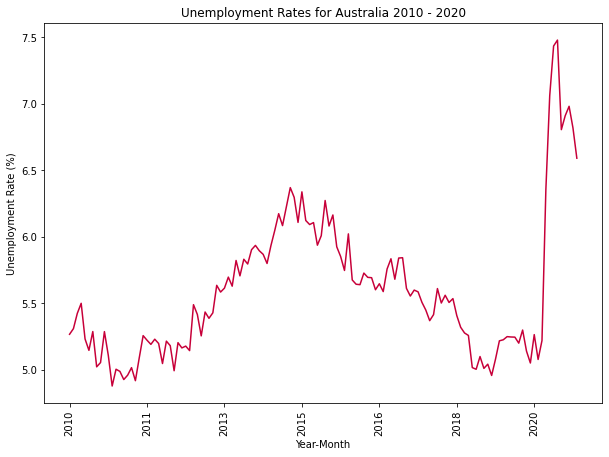

In [10]:
# Create the line graph over the last

unemployment_ratesaus_df.plot("year", "observation_value", ylabel = "Unemployment Rate (%)", legend = False, color='#C70039', figsize = (10, 7))
plt.xticks(rotation = 90)
plt.title("Unemployment Rates for Australia 2010 - 2020")
plt.xlabel("Year-Month")

plt.show()


In [11]:
unemployment_ratesaus_df.dtypes
unemployment_ratesaus_df["year"]=unemployment_ratesaus_df["year"].astype('int64')
unemployment_ratesaus_df.dtypes


region_description              object
data_item_description           object
sex_description                 object
age_description                 object
adjustment_type_description     object
observation_month               object
observation_value              float64
year                             int64
month                           object
dtype: object

In [12]:
unemployment_ratesaus_df = unemployment_ratesaus_df.loc[unemployment_ratesaus_df["year"]>=2018]



In [13]:
# show the last 5 rows
unemployment_ratesaus_df.tail()







,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value,year,month
391,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-08,6.804698,2020,08
392,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-09,6.909572,2020,09
393,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-10,6.980306,2020,10
394,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-11,6.817515,2020,11
395,Australia,Unemployment rate (%),Persons,15 and over,Seasonally Adjusted,2020-12,6.589865,2020,12


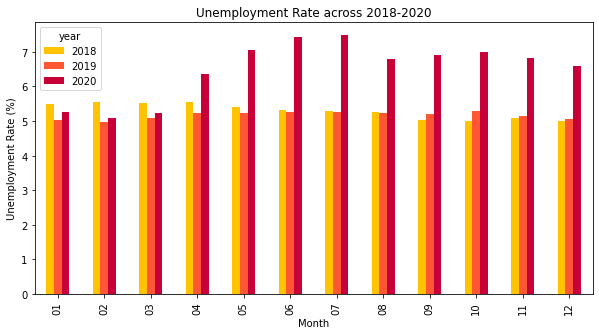

In [14]:
unemployment_ratesaus_df.pivot("month","year","observation_value").plot(kind = "bar", figsize = (10, 5), color=['#FFC300', '#FF5733', '#C70039'])
plt.title("Unemployment Rate across 2018-2020")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")

plt.show()